In [123]:
# All auxiliary code is in ../src

import sys

sys.path.append("../src/")

In [124]:
import pandas as pd

# Machine Learning
The discipline of creating machines able to learn.

- Learn what? A model
- To solve what? A task
- Learn how? By using a learning algorithm
- Learning by? Searching

In [125]:
adult = pd.read_csv('./../data/adult.data', delimiter=",",
                    names=['age', 'workclass', 'fnlwgt', 'education', 
         
                           'education_num', 'marital_status', 'occupation', 
                           'relationship', 'race', 'is_male', 'capital_gain', 'capital_loss',
                           'hours_per_week', 'native_country', 'over_threshold'])
adult.rename(columns={'over_threshold': 'label'}, inplace=True)
adult.drop(columns=['education_num'], inplace=True)

In [126]:
#visualize the structure of the dataset
adult.head()

age          workclass  fnlwgt   education       marital_status  \
0   39          State-gov   77516   Bachelors        Never-married   
1   50   Self-emp-not-inc   83311   Bachelors   Married-civ-spouse   
2   38            Private  215646     HS-grad             Divorced   
3   53            Private  234721        11th   Married-civ-spouse   
4   28            Private  338409   Bachelors   Married-civ-spouse   

           occupation    relationship    race  is_male  capital_gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital_loss  hours_per_week  native_country   label  
0             0              40   United-States   <=50K  
1             0              13   United-States   <=50K  
2             0              40   United-States   <=50K  
3             0              40   United-States   <=50K  
4             0              40            Cuba   <=50K

In [127]:
#a descrption of the dataset
adult.describe()

age        fnlwgt  capital_gain  capital_loss  hours_per_week
count  32561.000000  3.256100e+04  32561.000000  32561.000000    32561.000000
mean      38.581647  1.897784e+05   1077.648844     87.303830       40.437456
std       13.640433  1.055500e+05   7385.292085    402.960219       12.347429
min       17.000000  1.228500e+04      0.000000      0.000000        1.000000
25%       28.000000  1.178270e+05      0.000000      0.000000       40.000000
50%       37.000000  1.783560e+05      0.000000      0.000000       40.000000
75%       48.000000  2.370510e+05      0.000000      0.000000       45.000000
max       90.000000  1.484705e+06  99999.000000   4356.000000       99.000000

In [128]:
#check if there is any null value
adult.isnull().values.any()

False

In [129]:
adult

age          workclass  fnlwgt    education       marital_status  \
0       39          State-gov   77516    Bachelors        Never-married   
1       50   Self-emp-not-inc   83311    Bachelors   Married-civ-spouse   
2       38            Private  215646      HS-grad             Divorced   
3       53            Private  234721         11th   Married-civ-spouse   
4       28            Private  338409    Bachelors   Married-civ-spouse   
...    ...                ...     ...          ...                  ...   
32556   27            Private  257302   Assoc-acdm   Married-civ-spouse   
32557   40            Private  154374      HS-grad   Married-civ-spouse   
32558   58            Private  151910      HS-grad              Widowed   
32559   22            Private  201490      HS-grad        Never-married   
32560   52       Self-emp-inc  287927      HS-grad   Married-civ-spouse   

               occupation    relationship    race  is_male  capital_gain  \
0            Adm-clerical   Not-in-family   White     Male          2174   
1         Exec-managerial         Husband   White     Male             0   
2       Handlers-cleaners   Not-in-family   White     Male             0   
3       Handlers-cleaners         Husband   Black     Male             0   
4          Prof-specialty            Wife   Black   Female             0   
...                   ...             ...     ...      ...           ...   
32556        Tech-support            Wife   White   Female             0   
32557   Machine-op-inspct         Husband   White     Male             0   
32558        Adm-clerical       Unmarried   White   Female             0   
32559        Adm-clerical       Own-child   White     Male             0   
32560     Exec-managerial            Wife   White   Female         15024   

       capital_loss  hours_per_week  native_country   label  
0                 0              40   United-States   <=50K  
1                 0              13   United-States   <=50K  
2                 0              40   United-States   <=50K  
3                 0              40   United-States   <=50K  
4                 0              40            Cuba   <=50K  
...             ...             ...             ...     ...  
32556             0              38   United-States   <=50K  
32557             0              40   United-States    >50K  
32558             0              40   United-States   <=50K  
32559             0              20   United-States   <=50K  
32560             0              40   United-States    >50K  

[32561 rows x 14 columns]

### Discretize the categorical variables
We can discretize the categorical variables and then use them for the classification task. NB: for some classifiers it may not be a good practice (example: classifiers which use distance metrics for the classifications, such as KNN)

In [130]:
#function to discretize the variables
#input: the dataset and the list of variables' names to discretize
def discretize_data(dataset, variables):
    for variable in variables:
        #get the unique variable's values
        var = sorted(dataset[variable].unique())
        
        #generate a mapping from the variable's values to the number representation  
        mapping = dict(zip(var, range(0, len(var) + 1)))

        #add a new colum with the number representation of the variable
        dataset[variable+'_num'] = dataset[variable].map(mapping).astype(int)
    return dataset

In [131]:
#discretize the variable relationship, sex, occupation, marital-status, native-country, race
variables = ['relationship', 'race', 'is_male', 'occupation', 'marital_status', 
             'workclass', 'native_country', 'education', 'label']
adult = discretize_data(adult, variables)
#drop the categorical variables since we don't need them anymore 
adult.drop(columns=variables, axis=1,inplace=True)

In [132]:
adult

age  fnlwgt  capital_gain  capital_loss  hours_per_week  \
0       39   77516          2174             0              40   
1       50   83311             0             0              13   
2       38  215646             0             0              40   
3       53  234721             0             0              40   
4       28  338409             0             0              40   
...    ...     ...           ...           ...             ...   
32556   27  257302             0             0              38   
32557   40  154374             0             0              40   
32558   58  151910             0             0              40   
32559   22  201490             0             0              20   
32560   52  287927         15024             0              40   

       relationship_num  race_num  is_male_num  occupation_num  \
0                     1         4            1               1   
1                     0         4            1               4   
2                     1         4            1               6   
3                     0         2            1               6   
4                     5         2            0              10   
...                 ...       ...          ...             ...   
32556                 5         4            0              13   
32557                 0         4            1               7   
32558                 4         4            0               1   
32559                 3         4            1               1   
32560                 5         4            0               4   

       marital_status_num  workclass_num  native_country_num  education_num  \
0                       4              7                  39              9   
1                       2              6                  39              9   
2                       0              4                  39             11   
3                       2              4                  39              1   
4                       2              4                   5              9   
...                   ...            ...                 ...            ...   
32556                   2              4                  39              7   
32557                   2              4                  39             11   
32558                   6              4                  39             11   
32559                   4              4                  39             11   
32560                   2              5                  39             11   

       label_num  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
32556          0  
32557          1  
32558          0  
32559          0  
32560          1  

[32561 rows x 14 columns]

In [133]:
#the resulting dataset
adult.head()

age  fnlwgt  capital_gain  capital_loss  hours_per_week  relationship_num  \
0   39   77516          2174             0              40                 1   
1   50   83311             0             0              13                 0   
2   38  215646             0             0              40                 1   
3   53  234721             0             0              40                 0   
4   28  338409             0             0              40                 5   

   race_num  is_male_num  occupation_num  marital_status_num  workclass_num  \
0         4            1               1                   4              7   
1         4            1               4                   2              6   
2         4            1               6                   0              4   
3         2            1               6                   2              4   
4         2            0              10                   2              4   

   native_country_num  education_num  label_num  
0                  39              9          0  
1                  39              9          0  
2                  39             11          0  
3                  39              1          0  
4                   5              9          0

### Encoding

Encoding also highly depends on the model we wish to train, so adapt it accordingly!

In [134]:
from sklearn.preprocessing import OneHotEncoder

cat_columns = ['relationship_num', 'race_num', 'is_male_num','occupation_num', 'marital_status_num', 
               'workclass_num', 'native_country_num', 'education_num']



In [135]:
adult_encoded = pd.get_dummies(adult, columns = cat_columns, prefix_sep='%')

In [136]:
adult_encoded.head()

age  fnlwgt  capital_gain  capital_loss  hours_per_week  label_num  \
0   39   77516          2174             0              40          0   
1   50   83311             0             0              13          0   
2   38  215646             0             0              40          0   
3   53  234721             0             0              40          0   
4   28  338409             0             0              40          0   

   relationship_num%0  relationship_num%1  relationship_num%2  \
0               False                True               False   
1                True               False               False   
2               False                True               False   
3                True               False               False   
4               False               False               False   

   relationship_num%3  ...  education_num%6  education_num%7  education_num%8  \
0               False  ...            False            False            False   
1               False  ...            False            False            False   
2               False  ...            False            False            False   
3               False  ...            False            False            False   
4               False  ...            False            False            False   

   education_num%9  education_num%10  education_num%11  education_num%12  \
0             True             False             False             False   
1             True             False             False             False   
2            False             False              True             False   
3            False             False             False             False   
4             True             False             False             False   

   education_num%13  education_num%14  education_num%15  
0             False             False             False  
1             False             False             False  
2             False             False             False  
3             False             False             False  
4             False             False             False  

[5 rows x 108 columns]

# Classfication with decision tree

In [137]:
df = adult.copy()

In [138]:
#to classify, we first need to split the dataset into train and test dataset.
#we can do so using train_test_split, in this case we select a stratified split
from sklearn.model_selection import train_test_split
label = df.pop('label_num')
train_set, test_set, train_label, test_label = train_test_split(df, label, stratify =label, test_size=0.30)

In [139]:
#define a decision tree and fit it
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                  max_depth=10, 
                                  min_samples_split=3, min_samples_leaf=4)
dt = dt.fit(train_set, train_label)

In [140]:
# To visualize the Decision Tree, you must intsall GraphViz
# MacOs: brew install graphviz
# Linux: sudo apt-get install graphviz
# Windows: Install from here https://graphviz.org/download/ 
# and add the following enviroment variable (the path can change)
# import os
# os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

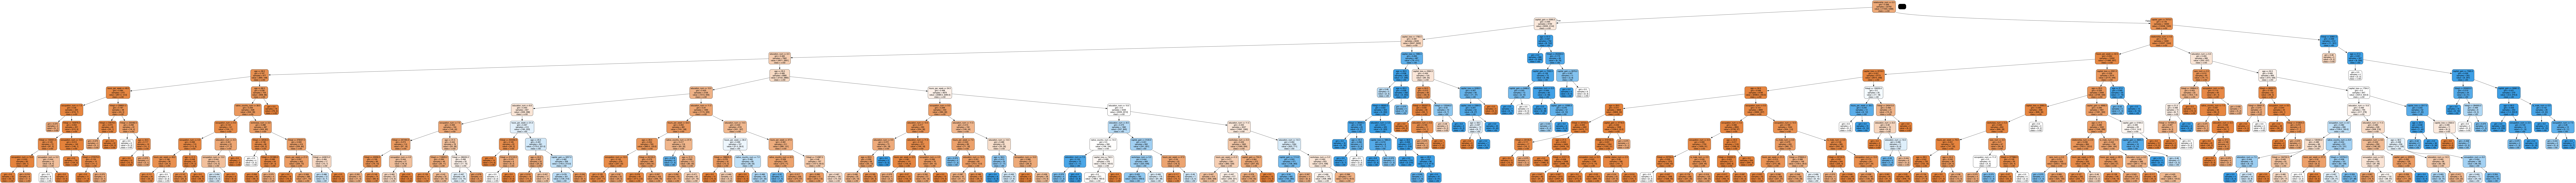

In [141]:
#visualize the actual decision tree obtained 
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=list(train_set.columns),  
                         class_names=['<=50', '>50'],  
                         filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [142]:
#predict using the decision tree
#the predict function returns the actual predicted labels: we need them for the evaluation phase
train_pred_dt = dt.predict(train_set)
test_pred_dt = dt.predict(test_set)

### Evaluation of the decision tree: compute accuracy, precision, recall, confusion matrix

In [143]:
#evaulate the accuracy on the train set and the test set
#metrics also contains precision, recall, f1 and the support
from sklearn import metrics
print('Accuracy train set ', metrics.accuracy_score(train_label, train_pred_dt))
print('Accuracy test set ', metrics.accuracy_score(test_label, test_pred_dt))
print('Precision train set ', metrics.precision_score(train_label, train_pred_dt, average='weighted'))
print('Recall train set ', metrics.recall_score(train_label, train_pred_dt, average='weighted'))
print('F1 score train set ', metrics.f1_score(train_label, train_pred_dt, average='weighted'))
print('Support train set ', metrics.precision_recall_fscore_support(train_label, train_pred_dt))

Accuracy train set  0.8628466128466128
Accuracy test set  0.8500358276179752
Precision train set  0.8577213562005225
Recall train set  0.8628466128466128
F1 score train set  0.8544188603082735
Support train set  (array([0.87570891, 0.80101911]), array([0.95486332, 0.57278193]), array([0.91357479, 0.66794136]), array([17303,  5489]))


In [144]:
#metrics computed on the test set
from sklearn.metrics import classification_report
def report_scores(test_label, test_pred):
    print(classification_report(test_label, 
                            test_pred, 
                            target_names=['<=50', '>50']))

In [145]:
report_scores(test_label, test_pred_dt)

              precision    recall  f1-score   support

        <=50       0.87      0.95      0.91      7417
         >50       0.76      0.55      0.64      2352

    accuracy                           0.85      9769
   macro avg       0.82      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769



In [146]:
#cross validation
#the score array for test/train scores on each cv split
#the time for fitting/scoring the estimator on the train set for each cv split
from sklearn.model_selection import cross_validate
import statistics 
scores = cross_validate(dt, train_set, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.02693629264831543
Score time  0.001279751459757487
Test score  0.8472709466588301
Train score  0.8675851578839601


In [147]:
#compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_label, test_pred_dt)
cm

array([[7015,  402],
       [1063, 1289]])

In [148]:
cm.shape

(2, 2)

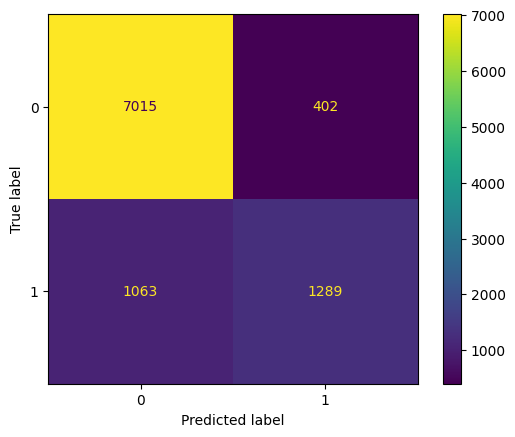

In [149]:
#it is possible to plot the confusion matrix 
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

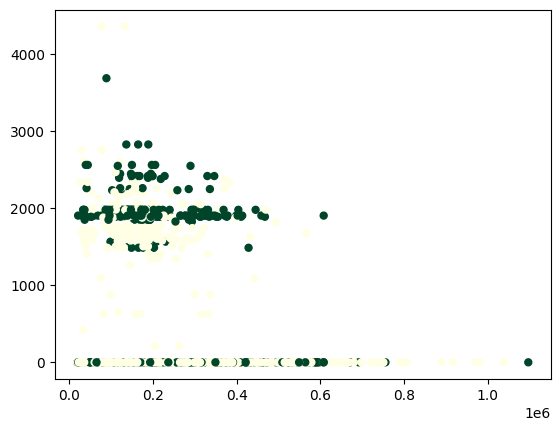

In [150]:
from sklearn.datasets import make_blobs
plt.scatter(test_set.iloc[:, 1].values, test_set.iloc[:, 3].values, c=test_label.values, s=25, cmap='YlGn');

# Solution space and hyperparameters

Each learning algorithm can be characterized by a set of hyperparameters, e.g., the architecture of a neural network, that must be set in order to learn a model.
Searching through this hyperparameter space requires a **search policy**.

In [151]:
#to find the best set of parameter setting, we can run a grid search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

#define the parameters' values you want to try
param_dist = {"max_depth": [2,3,5,6,7,10,12,None],
              "max_features": sp_randint(1, len(train_set.iloc[0]) + 1),
              "min_samples_split": sp_randint(10, 51),
              "min_samples_leaf": sp_randint(10, 51),
              "criterion": ["entropy", "gini"],
              "class_weight":['balanced', None, {0: 0.3, 1: 0.7}]}
#define the number of iters
n_iter_search = 50
#define the model
clf = tree.DecisionTreeClassifier()
#define the grid search
grid_search = RandomizedSearchCV(clf, param_distributions=param_dist, 
                            n_iter=n_iter_search, 
                            n_jobs=10, 
                            scoring=make_scorer(accuracy_score))
#run the grid search
grid_search.fit(train_set, train_label)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=50, n_jobs=10,
                   param_distributions={'class_weight': ['balanced', None,
                                                         {0: 0.3, 1: 0.7}],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 5, 6, 7, 10, 12,
                                                      None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x35e0276e0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x35c86cbf0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1475e4770>},
                   scoring=make_scorer(accuracy_score, response_method='predict'))

In [152]:
print('Best setting parameters ', grid_search.cv_results_['params'][0])
print('Mean and std of this setting ', grid_search.cv_results_['mean_test_score'][0], 
      grid_search.cv_results_['std_test_score'][0])

Best setting parameters  {'class_weight': None, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 23, 'min_samples_split': 25}
Mean and std of this setting  0.8170407665630315 0.005045732532992869


# Random Forest

In [153]:
rf = RandomForestClassifier(n_estimators=30, 
                             criterion='gini',
                             max_features=7,
                             max_depth=5, 
                             min_samples_split=36,
                             min_samples_leaf=15,
                             bootstrap=False) 
rf = rf.fit(train_set, train_label)

In [154]:
#prediction on the test test
test_pred_rf = rf.predict(test_set)

In [155]:
#compute the performance of the model
report_scores(test_label, test_pred_rf)

              precision    recall  f1-score   support

        <=50       0.81      1.00      0.89      7417
         >50       0.95      0.27      0.42      2352

    accuracy                           0.82      9769
   macro avg       0.88      0.63      0.66      9769
weighted avg       0.85      0.82      0.78      9769



#### We can try to improve the performance by using class weights

In [156]:
class_weights = {0: 0.35, 1:0.65}
rf = RandomForestClassifier(n_estimators=30, 
                             criterion='gini',
                             max_features=8,
                             max_depth=6, 
                             min_samples_split=32,
                             min_samples_leaf=10,
                             bootstrap=False,
                             class_weight= class_weights) 
rf = rf.fit(train_set, train_label)

In [157]:
#prediction on the test test
test_pred_rf = rf.predict(test_set)

#### In this way we obtain a better performance in terms of recall for the class 1, but we loose a bit on the recall of class 0.

In [158]:
#compute the performance of the model
print(classification_report(test_label, 
                            test_pred_rf, 
                            target_names=['<=50', '>50']))

              precision    recall  f1-score   support

        <=50       0.94      0.79      0.86      7417
         >50       0.56      0.84      0.67      2352

    accuracy                           0.80      9769
   macro avg       0.75      0.82      0.77      9769
weighted avg       0.85      0.80      0.82      9769



# Classification with Naive Bayes
Bayes’ Theorem provides a way that we can calculate the probability of a piece of data belonging to a given class, given our prior knowledge. Bayes’ Theorem is stated as:

P(class|data) = (P(data|class) * P(class)) / P(data)
Where P(class|data) is the probability of class given the provided data.

In [159]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_set, train_label)

#predict on the test set
test_pred_gnb = gnb.predict(test_set)

In [160]:
#compute the performance of the model
report_scores(test_label,test_pred_gnb)

              precision    recall  f1-score   support

        <=50       0.81      0.95      0.88      7417
         >50       0.66      0.31      0.42      2352

    accuracy                           0.80      9769
   macro avg       0.74      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



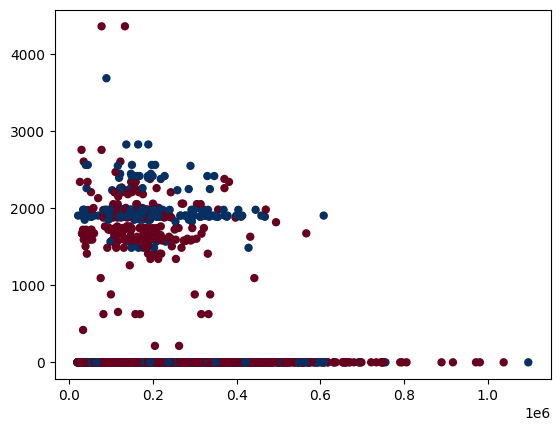

In [161]:
from sklearn.datasets import make_blobs
plt.scatter(test_set.iloc[:, 1].values, test_set.iloc[:, 3].values, c=test_label.values, s=25, cmap='RdBu');

# Classification with KNN

In [162]:
#drop the categorical features
train_set_no_cat = train_set.loc[:,~train_set.columns.str.contains('_num', case=False)] 
test_set_no_cat = test_set.loc[:,~test_set.columns.str.contains('_num', case=False)] 

In [163]:
from sklearn.neighbors import KNeighborsClassifier
#['auto', 'ball_tree', 'kd_tree', 'brute']
knn = KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree', metric='minkowski').fit(train_set_no_cat, train_label)

In [164]:
#prediction on the test test
test_pred_knn = knn.predict(test_set_no_cat)

In [165]:
#compute the performance of the model
report_scores(test_label,test_pred_knn)

              precision    recall  f1-score   support

        <=50       0.80      0.95      0.87      7417
         >50       0.62      0.26      0.37      2352

    accuracy                           0.78      9769
   macro avg       0.71      0.60      0.62      9769
weighted avg       0.76      0.78      0.75      9769



# Classification with SVM

In [166]:
#linear,poly,rbf,sigmoid,precomputed
from sklearn.svm import SVC
svm = SVC(kernel='sigmoid', C=0.5, gamma='scale', probability=True)
svm.fit(train_set, train_label)

SVC(C=0.5, kernel='sigmoid', probability=True)

In [167]:
#prediction on the test test
test_pred_proba_svm = svm.predict_proba(test_set)

In [168]:
test_pred_proba_svm

array([[0.76782999, 0.23217001],
       [0.75961064, 0.24038936],
       [0.75355191, 0.24644809],
       ...,
       [0.76754524, 0.23245476],
       [0.76754477, 0.23245523],
       [0.76516334, 0.23483666]])

In [169]:
test_pred_svm = svm.predict(test_set)

In [170]:
test_pred_svm

array([1, 0, 0, ..., 1, 1, 0])

In [171]:
#compute the performance of the model
print(classification_report(test_label, 
                            test_pred_svm, 
                            target_names=['<=50', '>50']))

              precision    recall  f1-score   support

        <=50       0.77      0.77      0.77      7417
         >50       0.26      0.26      0.26      2352

    accuracy                           0.65      9769
   macro avg       0.52      0.52      0.52      9769
weighted avg       0.65      0.65      0.65      9769



# Ensemble Classifiers

## Boosting - XGBoost

An iterative procedure to adaptively change distribution of training
data by focusing more on previously misclassified records.

• Initially, all the records are assigned equal weights.

• Unlike bagging, weights may change at the end of each boosting round.

In [193]:
from xgboost import XGBClassifier


base_model = XGBClassifier()
hyperparameters = {
    "n_estimators": [25, 100, 250],
    "max_depth": [2, 3],
    "learning_rate": [1, 0.1, 0.001, 0.0001]
}
search = RandomizedSearchCV(base_model, hyperparameters)
search.fit(train_set, train_label)
clf = search.best_estimator_
clf.fit(train_set, train_label)

In [173]:
test_pred_xgb = clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_xgb, 
                            target_names=['<=50', '>50']))

              precision    recall  f1-score   support

        <=50       0.89      0.94      0.92      7417
         >50       0.78      0.64      0.70      2352

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769



# AdaBoost

In [174]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(train_set, train_label)

/Users/lorenzomannocci/anaconda3/envs/phd/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [175]:
test_pred_clf = clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_clf, 
                            target_names=['<=50', '>50']))

              precision    recall  f1-score   support

        <=50       0.89      0.93      0.91      7417
         >50       0.75      0.63      0.69      2352

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



Adaboost has many parameters, we can select the base classifier, which can be a DecisionTree, a Logistic Regression and so on, we can select the number of estimators and the learning rate.

In [176]:
base = tree.DecisionTreeClassifier(max_depth=5)
clf = AdaBoostClassifier(estimator=base, n_estimators=200, learning_rate=0.1)
clf.fit(train_set, train_label)

/Users/lorenzomannocci/anaconda3/envs/phd/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.1, n_estimators=200)

In [177]:
test_pred_clf = clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_clf, 
                            target_names=['<=50', '>50']))

              precision    recall  f1-score   support

        <=50       0.89      0.93      0.91      7417
         >50       0.74      0.63      0.68      2352

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.85      0.86      0.85      9769



## Random Forest

### Bagging
(a.k.a. Bootstrap AGGregatING)

• Sampling with replacement

• Build classifier on each bootstrap sample

• Each sample has probability (1 – 1/n)n of being selected

With bagging we have an ensemble of structurally similar trees. This
causes highly correlated trees.
• Random Forest aims at creating trees that have no correlation or
weak correlation

To de-correlate the trees:
1. Take a random sample of size N with replacement from the data.
2. Learn a decision tree where for each split a random sample without
replacement of m attributes is considere

In [178]:
#define and fit a random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, 
                             criterion='gini',
                             max_features=3,
                             max_depth=4, 
                             min_samples_split=2,
                             min_samples_leaf=8,
                             bootstrap=True) 
rf = rf.fit(train_set, train_label)

In [179]:
#define and fit a random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, 
                             criterion='gini',
                             max_features=3,
                             max_depth=4, 
                             min_samples_split=2,
                             min_samples_leaf=8,
                             bootstrap=True) 
rf = rf.fit(train_set, train_label)

In [180]:
#prediction on the test test
test_pred_rf = rf.predict(test_set)

In [181]:
#compute the performance of the model
report_scores(test_label, test_pred_rf)

              precision    recall  f1-score   support

        <=50       0.81      1.00      0.89      7417
         >50       0.97      0.25      0.40      2352

    accuracy                           0.82      9769
   macro avg       0.89      0.62      0.65      9769
weighted avg       0.85      0.82      0.77      9769



# Comparison

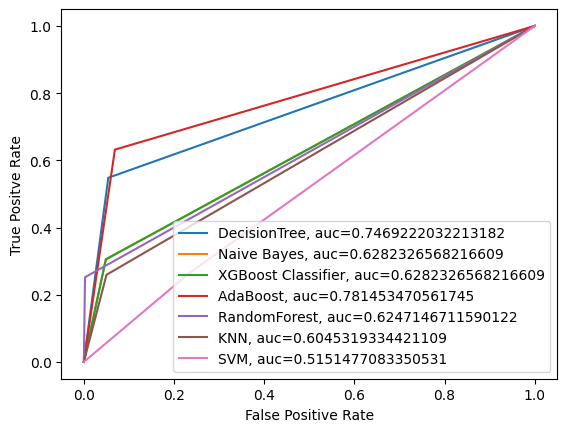

In [184]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_dt)
auc = metrics.roc_auc_score(test_label, test_pred_dt)
plt.plot(fpr,tpr,label="DecisionTree, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_gnb)
auc = metrics.roc_auc_score(test_label, test_pred_gnb)
plt.plot(fpr,tpr,label="Naive Bayes, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_gnb)
auc = metrics.roc_auc_score(test_label, test_pred_gnb)
plt.plot(fpr,tpr,label="XGBoost Classifier, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_clf)
auc = metrics.roc_auc_score(test_label, test_pred_clf)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_rf)
auc = metrics.roc_auc_score(test_label, test_pred_rf)
plt.plot(fpr,tpr,label="RandomForest, auc="+str(auc))


fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_knn)
auc = metrics.roc_auc_score(test_label, test_pred_knn)
plt.plot(fpr,tpr,label="KNN, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_svm)
auc = metrics.roc_auc_score(test_label, test_pred_svm)
plt.plot(fpr,tpr,label="SVM, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')

plt.legend(loc=0)

# Classification with rule based 

#### There are several rule-based methods. One of the most popular is RIPPER. To use it, you have to install it using !pip install wittgenstein. The documentation of this method can be found in https://github.com/imoscovitz/wittgenstein

In [63]:
#we run a grid search to find the best configuration of parameters' values
# prune_size: change the grow/prune proportion
# k: the number of optimization runs

import wittgenstein as lw
ripper = lw.RIPPER()
param_grid = {"prune_size": [0.5, 0.6], "k": [1, 3, 5]}
grid_search = GridSearchCV(estimator=ripper, param_grid=param_grid)
grid_search.fit(train_set, train_label)

GridSearchCV(estimator=<RIPPER(verbosity=0, n_discretize_bins=10, prune_size=0.33, max_total_conds=None, dl_allowance=64, k=2, random_state=None, alpha=1.0, max_rule_conds=None, max_rules=None)>,
             param_grid={'k': [1, 3, 5], 'prune_size': [0.5, 0.6]})

In [64]:
print('Best parameters setting ', grid_search.cv_results_['params'][0])

Best parameters setting  {'k': 1, 'prune_size': 0.5}


In [65]:
#define and fit the rule-based model
#this function requires only one dataset with the labels. 
#To do so, we concatenate the train_set and the train_label
import wittgenstein as lw
ripper = lw.RIPPER(k=1, prune_size=0.50)
datas = pd.concat([train_set, train_label], axis=1)
ripper.fit(datas, class_feat='label_num', pos_class=1)

In [66]:
#in this case the model is a set of rules
ripper.out_model()

[[marital_status_num=2 ^ education_num=8.0-9.0 ^ occupation_num=3.0-4.0 ^ hours_per_week=40.0-48.0] V
[marital_status_num=2 ^ occupation_num=8.0-10.0 ^ capital_loss=1742.4-2178.0 ^ race_num=4 ^ education_num=>11.0] V
[marital_status_num=2 ^ education_num=8.0-9.0 ^ occupation_num=3.0-4.0 ^ hours_per_week=48.0-55.0] V
[marital_status_num=2 ^ occupation_num=8.0-10.0 ^ education_num=>11.0 ^ age=45.0-51.0 ^ hours_per_week=>55.0] V
[marital_status_num=2 ^ occupation_num=8.0-10.0 ^ education_num=>11.0 ^ hours_per_week=48.0-55.0 ^ age=45.0-51.0 ^ workclass_num=4] V
[marital_status_num=2 ^ occupation_num=8.0-10.0 ^ age=51.0-58.0 ^ race_num=4 ^ fnlwgt=130734.0-158042.4] V
[marital_status_num=2 ^ occupation_num=8.0-10.0 ^ age=37.0-41.0] V
[marital_status_num=2 ^ education_num=8.0-9.0 ^ capital_loss=1742.4-2178.0 ^ workclass_num=4] V
[marital_status_num=2 ^ education_num=>11.0 ^ occupation_num=8.0-10.0 ^ age=51.0-58.0] V
[marital_status_num=2 ^ occupation_num=3.0-4.0 ^ capital_loss=1742.4-2178.0] 

In [67]:
ripper.predict(test_set)

[False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,


In [68]:
#evaluation of the performance of the classifier
from sklearn.metrics import precision_score, recall_score
print('Accuracy ', ripper.score(test_set, test_label))
print('Precision ', ripper.score(test_set, test_label, precision_score))
print('Recall ', ripper.score(test_set, test_label, recall_score))

Accuracy  0.8204524516327157
Precision  0.6892405063291139
Recall  0.4630102040816326


In [69]:
#with rule based classifiers it is possible to extract the reasons for the prediction.
#only for the positive predictions
ripper.predict(test_set[:15], give_reasons=True)

([False,
  False,
  False,
  True,
  False,
  False,
  True,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 [[],
  [],
  [],
  [<Rule [marital_status_num=2^education_num=8.0-9.0]>],
  [],
  [],
  [<Rule [marital_status_num=2^occupation_num=8.0-10.0^hours_per_week=48.0-55.0^fnlwgt=>327778.0]>,
   <Rule [marital_status_num=2^education_num=>11.0^occupation_num=8.0-10.0]>,
   <Rule [marital_status_num=2^occupation_num=8.0-10.0^hours_per_week=48.0-55.0]>],
  [<Rule [marital_status_num=2^education_num=8.0-9.0]>],
  [],
  [],
  [],
  [],
  [],
  [],
  []])

# Classification with neural network

#### Another possibility is to employ neural networks. Even if they are more suited for time series, text or images, we can try a simple example just to see how they work. We define, using keras (under tensorflow), a simple feed forward nn and then we fit it. Note that in this case the nn is a Sequential model, composed of layers. We can add as many layers as we want, but in the first one we need to define the input structure.  

Let's start with a simple neural network composed by 1 hidden layer.

In [187]:
import tensorflow as tf
import numpy as np
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1, 13)),
  tf.keras.layers.Dense(32, activation='sigmoid'),  
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adamax',
              loss='mean_squared_error',
              metrics=['accuracy'])

/Users/lorenzomannocci/anaconda3/envs/phd/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [188]:
y_train = np.asarray(train_label).astype('float32').reshape((-1,1))
x_train = np.reshape(train_set.values, (train_set.shape[0], 1, train_set.shape[1]))
print(y_train.shape)
print(x_train.shape)

(22792, 1)
(22792, 1, 13)


In [190]:
history = model.fit(x_train, y_train,
                    epochs=80,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/80
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4143 - loss: 0.2562 - val_accuracy: 0.7572 - val_loss: 0.2126
Epoch 2/80
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.7581 - loss: 0.2053 - val_accuracy: 0.7570 - val_loss: 0.1925
Epoch 3/80
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.7624 - loss: 0.1887 - val_accuracy: 0.7570 - val_loss: 0.1868
Epoch 4/80
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.7593 - loss: 0.1851 - val_accuracy: 0.7570 - val_loss: 0.1850
Epoch 5/80
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.7624 - loss: 0.1820 - val_accuracy: 0.7570 - val_loss: 0.1843
Epoch 6/80
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.7593 - loss: 0.1828 - val_accuracy: 0.7570 - val_loss: 0.1840
Epoch 7/80
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.7617 - loss: 0.1814 - val_accuracy: 0.7570 - val_loss: 0.1838
Epoch 8/80
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.7602 - loss: 0.1819 - val_accuracy: 0.75

In [72]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,445 (5.65 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 964 (3.77 KB)

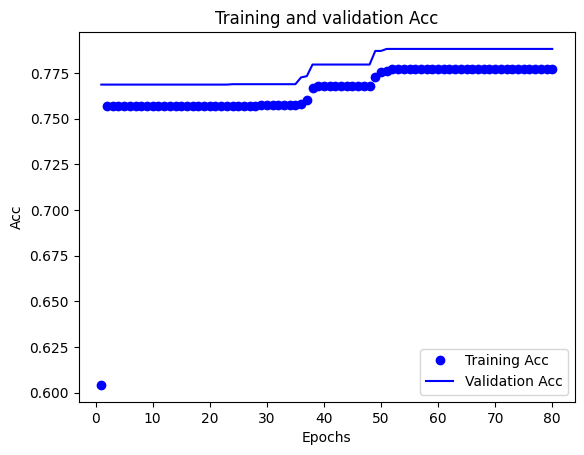

In [73]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [74]:
x_test = np.reshape(test_set.values, (test_set.shape[0], 1, test_set.shape[1]))
test_pred_nn = (model.predict(x_test) > 0.5).astype("int32")

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step


In [75]:
print(test_pred_nn)
print(len(test_pred_nn))
print(len(test_set))

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
9769
9769


In [76]:
report_scores(test_label, test_pred_nn)

              precision    recall  f1-score   support

        <=50       0.78      1.00      0.87      7417
         >50       0.90      0.10      0.17      2352

    accuracy                           0.78      9769
   macro avg       0.84      0.55      0.52      9769
weighted avg       0.81      0.78      0.70      9769



Since the first neural network is not performing well, we can modify it, by adding hidden layers and dropout. 

In [77]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1, 13)),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adamax',
              loss='mean_squared_error',
              metrics=['accuracy'])

/Users/lorenzomannocci/anaconda3/envs/phd/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [78]:
y_train = np.asarray(train_label).astype('float32').reshape((-1,1))
history = model.fit(x_train, y_train,
                    epochs=80,
                    batch_size=256,
                    validation_split=0.2)

Epoch 1/80
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7390 - loss: 0.1922 - val_accuracy: 0.7719 - val_loss: 0.1751
Epoch 2/80
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7641 - loss: 0.1802 - val_accuracy: 0.7730 - val_loss: 0.1737
Epoch 3/80
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7633 - loss: 0.1817 - val_accuracy: 0.7730 - val_loss: 0.1721
Epoch 4/80
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7648 - loss: 0.1774 - val_accuracy: 0.7739 - val_loss: 0.1699
Epoch 5/80
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7619 - loss: 0.1777 - val_accuracy: 0.7745 - val_loss: 0.1680
Epoch 6/80
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7622 - loss: 0.1757 - val_accuracy: 0.7750 - val_loss: 0.1666
Epoch 7/80
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7653 - loss: 0.1740 - val_accuracy: 0.7754 - val_loss: 0.1659
Epoch 8/80
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7698 - loss: 0.1723 - val_accuracy: 0.7758 - val_loss:

Epoch 52/80
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7835 - loss: 0.1680 - val_accuracy: 0.7953 - val_loss: 0.1590
Epoch 53/80
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7930 - loss: 0.1621 - val_accuracy: 0.8041 - val_loss: 0.1556
Epoch 54/80
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7880 - loss: 0.1644 - val_accuracy: 0.8035 - val_loss: 0.1559
Epoch 55/80
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7853 - loss: 0.1663 - val_accuracy: 0.7982 - val_loss: 0.1574
Epoch 56/80
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7860 - loss: 0.1654 - val_accuracy: 0.8041 - val_loss: 0.1551
Epoch 57/80
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7899 - loss: 0.1644 - val_accuracy: 0.8039 - val_loss: 0.1545
Epoch 58/80
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7874 - loss: 0.1647 - val_accuracy: 0.7877 - val_loss: 0.1607
Epoch 59/80
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7846 - loss: 0.1658 - val_accuracy: 0.8039 - v

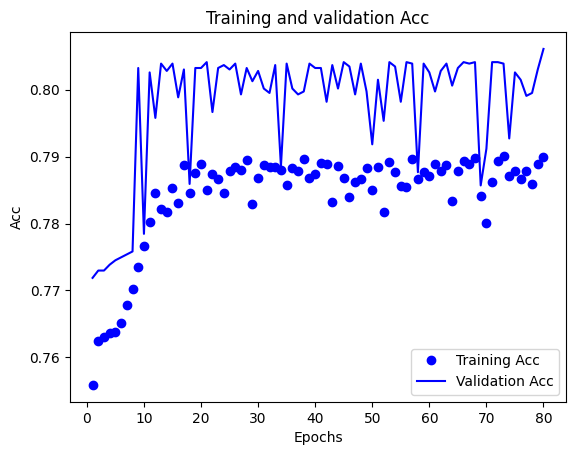

In [79]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [80]:
test_pred_nn = (model.predict(x_test) > 0.5).astype("int32")

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step


In [81]:
test_pred_nn

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [82]:
#compute the performance of the model
report_scores(test_label, test_pred_nn)

              precision    recall  f1-score   support

        <=50       0.80      0.97      0.88      7417
         >50       0.71      0.26      0.38      2352

    accuracy                           0.80      9769
   macro avg       0.76      0.61      0.63      9769
weighted avg       0.78      0.80      0.76      9769



# Advanced Neural Networks

Note: training these models can be extremely computational expensive, take care in running the following cells!

In [55]:
from rtdl_revisiting_models import MLP, ResNet, FTTransformer


# setting input and output dimensionality of the computational graphs
train_size, input_dimensionality = train_set.shape
output_dimensionality = 1
block_dimensionality = 192


resnet_model = ResNet(
    d_in=input_dimensionality,
    d_out=output_dimensionality,
    n_blocks=2,
    d_block=block_dimensionality,
    d_hidden=None,
    d_hidden_multiplier=2.0,
    dropout1=0.15,
    dropout2=0.0,
)

default_kwargs = FTTransformer.get_default_kwargs()
feature_transformer_model = FTTransformer(
    n_cont_features=input_dimensionality,
    cat_cardinalities=0,
    d_out=d_out,
    **default_kwargs
)

In [68]:
from neural_networks import train_feature_transformer, infer_on_feature_transformer

feature_transformer_model = train_feature_transformer(feature_transformer_model, train_set, test_set, number_epochs=1)
predictions = infer_on_feature_transformer(feature_transformer_model, train_set[:, :-1])

# Validation: dos and don'ts
Do:
- try different hyperparameter combinations sensibly, use the exhaustive search only if the hyperparameters change really has an effect and is time-manageable
- try different data preprocessings
- if enough data is available, use a separate dataset for model selection (see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) for a quick way to do it.)

Don't:
- select your model on the basis of the test set! The test set only *validates*: using it to select a model is cheating!